### 1) Importing libraries

In [7]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

### 2) Important Functions

#### function to show slices

In [2]:
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

#### function to load data and slicing

In [114]:
def load_data(image_arr , seg_arr , max_width , min_width , max_height , min_height  , max_depth , min_depth):

    for i in range(0,len(image_arr)):
        img = nib.load(image_arr[i])
        img_data = img.get_fdata()
        seg = nib.load(seg_arr[i])
        seg_data = seg.get_fdata()
        if (max_width is not None) and max_width ==  min_width  : 
            img_0 = img_data[ max_width, min_height:max_height, min_depth : max_depth]
            seg_0 = seg_data[ max_width, min_height:max_height,    min_depth : max_depth  ]
        elif (max_height is not None) and max_height == min_height:
            img_0 = img_data[min_width:max_width , max_height ,min_depth : max_depth]
            seg_0 = seg_data[min_width:max_width , max_height ,min_depth : max_depth ]
        elif (max_depth is not None) and max_depth == min_depth:
            img_0 = img_data[min_width:max_width, min_height:max_height, max_depth]
            seg_0 = seg_data[min_width:max_width, min_height:max_height,    max_depth  ]
        else:
            img_0 = img_data[min_width:max_width, min_height:max_height, min_depth : max_depth  ]
            seg_0 = seg_data[min_width:max_width, min_height:max_height,     min_depth : max_depth   ]
        show_slices([img_0,seg_0 ] )
        plt.suptitle(image_arr[i][28:-4] )  
        

### 3) Loading directories

In [38]:

directories = ['./datasets/archive/imagesTr' , './datasets/archive/labelsTr' ]
image_dataset = []
segment_dataset = []
iteration = 0
for directory in directories:
    iteration = iteration +1 
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        if os.path.isfile(f):
            if iteration == 1 :
                image_dataset.append(f)
            elif iteration == 2 :
                segment_dataset.append(f)
image_dataset = sorted(image_dataset)
segment_dataset = sorted(segment_dataset)
image_dataset = np.array(image_dataset)
segment_dataset = np.array(segment_dataset)

### 4) Get number of files in datasets

In [42]:
seg_shape = str(segment_dataset.shape)
image_shape = str(image_dataset.shape)
shapes = 'image_shape' + image_shape +  '    ' + 'seg_shape' + seg_shape  
print ( shapes )


image_shape(20,)    seg_shape(20,)


### 5)  Validation of dataset and Minimum width

In [48]:
minimum_width = 10000000
minimum_height = 10000000
minimum_depth = 10000000
for i in range(0, 20):
    image= nib.load(image_dataset[i]).get_fdata()
    image_shape = image.shape
    sig_shape = nib.load(segment_dataset[i]).get_fdata().shape
    width , height , depth = image_shape
    if width < minimum_width :
        minimum_width = width
    if height < minimum_height:
        minimum_height = height
    if depth < minimum_depth:
        minimum_depth = depth

    print('Image ' + image_dataset[i][28:-4] +',' + segment_dataset[i][28:-4] +' status ' + str(image_shape == sig_shape))

print( 'minimum_resolution = ' + str(minimum_width) +' , '+ 'minimum_height = ' + str(minimum_height) + ' , '+ 'minimum_depth = ' + str(minimum_depth) )

Image la_003,la_003 status True
Image la_004,la_004 status True
Image la_005,la_005 status True
Image la_007,la_007 status True
Image la_009,la_009 status True
Image la_010,la_010 status True
Image la_011,la_011 status True
Image la_014,la_014 status True
Image la_016,la_016 status True
Image la_017,la_017 status True
Image la_018,la_018 status True
Image la_019,la_019 status True
Image la_020,la_020 status True
Image la_021,la_021 status True
Image la_022,la_022 status True
Image la_023,la_023 status True
Image la_024,la_024 status True
Image la_026,la_026 status True
Image la_029,la_029 status True
Image la_030,la_030 status True
minimum_resolution = 320 , minimum_height = 320 , minimum_depth = 90


### 5) show the slices 

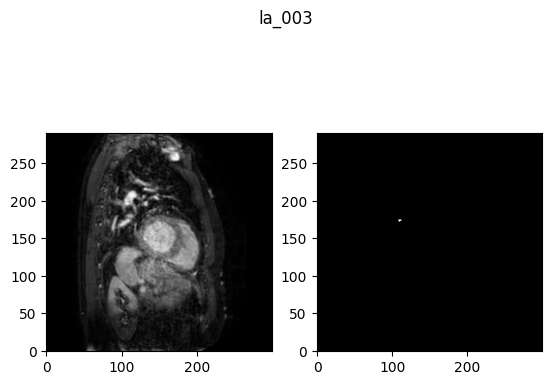

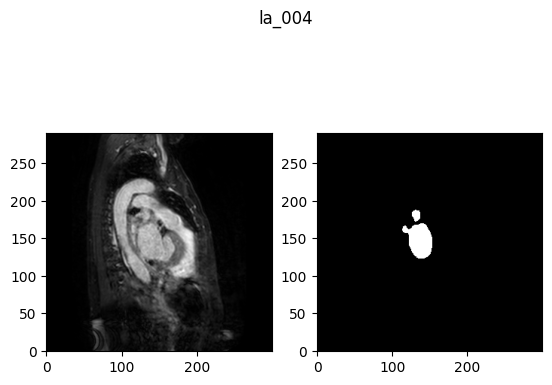

In [95]:
segment_dataset[0]
load_data([image_dataset[0] , image_dataset[1]] , [segment_dataset[0] , segment_dataset[1]] ,
                         min_width= 10 , max_width= -10 , min_height= 10 , max_height= -20 , max_depth= 45 , min_depth= 45 )



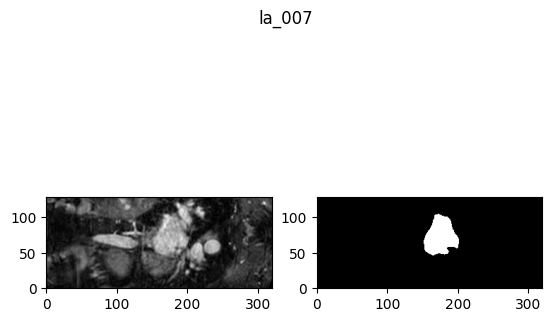

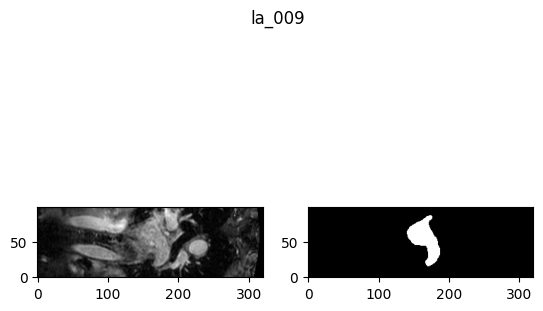

In [100]:

segment_dataset[0]
load_data([image_dataset[3] , image_dataset[4]] , [segment_dataset[3] , segment_dataset[4]] ,
                         min_width= 140 , max_width= 140 , min_height= None , max_height= None , max_depth = None, min_depth = None  )


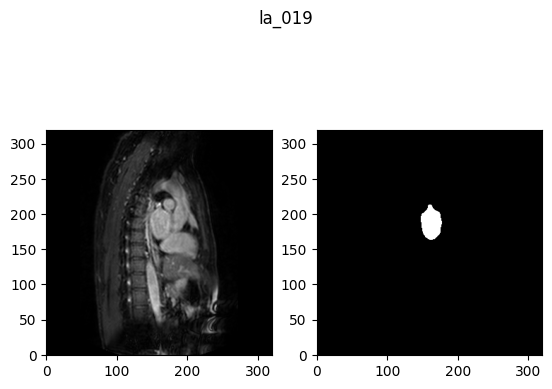

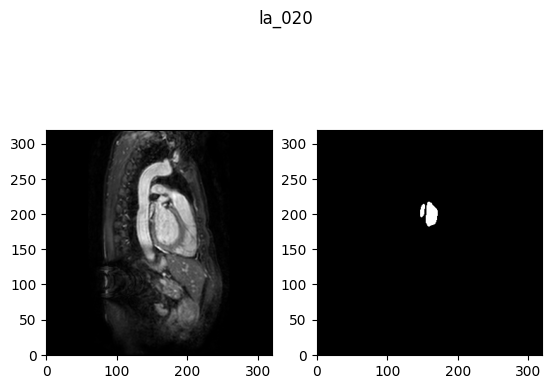

In [111]:
segment_dataset[0]
load_data([image_dataset[11] , image_dataset[12]] , [segment_dataset[11] , segment_dataset[12]] ,
                         min_width= None , max_width= None , min_height= None , max_height= None , max_depth = 45, min_depth = 45 )

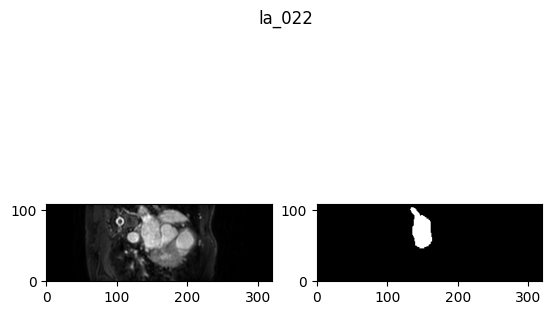

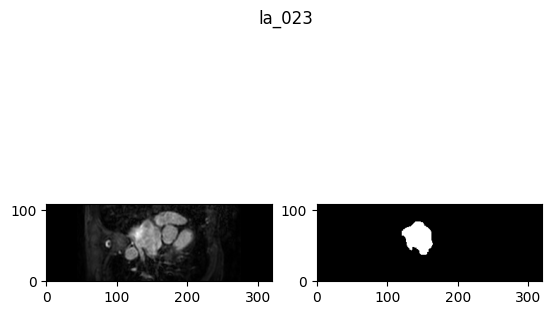

In [113]:
segment_dataset[0]
load_data([image_dataset[14] , image_dataset[15]] , [segment_dataset[14] , segment_dataset[15]] ,
                         min_width= None , max_width= None , min_height= 170 , max_height= 170 , max_depth = None, min_depth = None )